# Example of Umeyama's algorithm in action
This notebook provides a visual example of our implementation of Umeyama's algorithm.   
First we import numpy, matplotlib and our function and define a pratical function for 3D visualisation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from umeyama import umeyama

def scatter(*scatters, **kwargs):
    """Simple function to show a 3D scatter plot.
    """
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    for points, label in zip(scatters, kwargs['labels']):
        ax.scatter(*points, label=label, alpha=0.5)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    plt.legend()
    plt.show()

For our example, let us define a 3D point cloud representing a torus (see [wikipedia](https://en.wikipedia.org/wiki/Torus)). We set $X$ the 3D point cloud with $n$ points representing our torus. $X$ has shape (3, $n$).

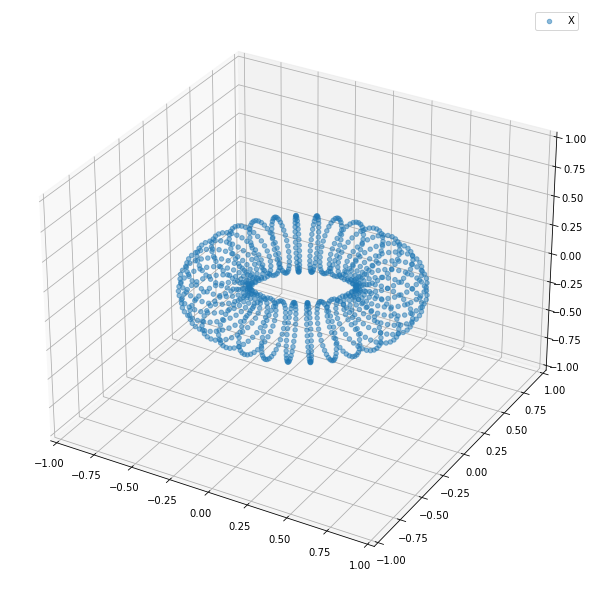

In [2]:
r = 0.2  # radius of the tube
R = 0.5  # radius of the circle

u = np.arange(0, 2 * np.pi, np.pi / 16)
u, v = np.meshgrid(u, u)
X = np.stack([
    ((R + r * np.cos(v)) * np.cos(u)).flatten(),
    ((R + r * np.cos(v)) * np.sin(u)).flatten(),
    (r * np.sin(v)).flatten()
])

scatter(X, labels='X')

Let us define $[c, R, t]$, the transformation we will apply to $X$.

In [3]:
c = 0.8
R = np.array([
    [ 0.61141766, -0.27197116,  0.7431017 ],
    [ 0.33401899,  0.94002161,  0.06921483],
    [-0.71735609,  0.20589091,  0.66558934]
])
t = np.array([
    [0.434],
    [0.547],
    [0.763]
])

We create $Y$ by applying this transformation to $X$.

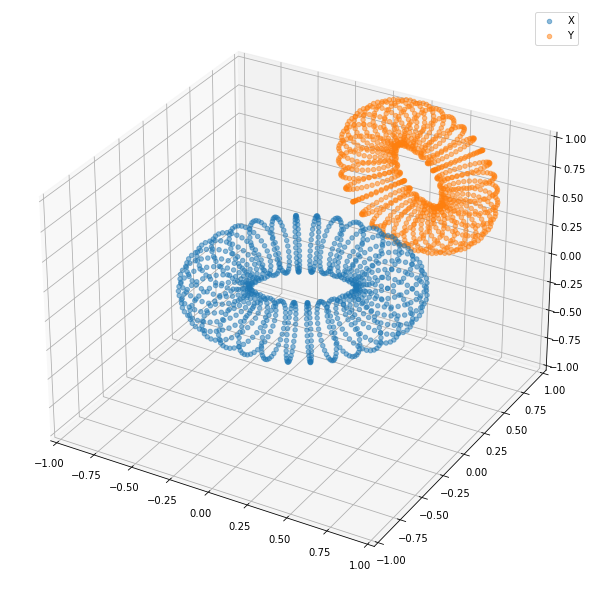

In [4]:
Y = c * R @ X + t

scatter(X, Y, labels=['X', 'Y'])

We now estimate these parameters with our Umeyama's algorithm implementation. Note that $X$ and $Y$ have shape ($m$, $n$) with $m=3$.

In [5]:
c_estimated, R_estimated, t_estimated = umeyama(X, Y)

We compare our estimation with our ground truth. To perform a visual comparison we plot $Y$ and the transformation of $X$ by $[c, R, t]$. If the parameters are optimal, the point clouds should superpose. We also print our estimation and compare it with the ground truth.

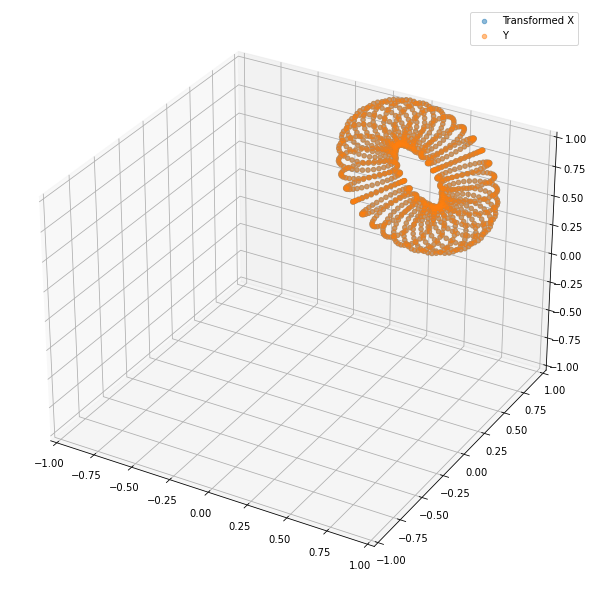

Ground truth c: 0.80
Estimated c: 0.80

Ground truth R:
0.611,	-0.272,	0.743
0.334,	0.940,	0.069
-0.717,	0.206,	0.666
Estimated R:
0.611,	-0.272,	0.743
0.334,	0.940,	0.069
-0.717,	0.206,	0.666

Ground truth t:	0.434	0.547	0.763
Estimated t:	0.434	0.547	0.763


In [6]:
scatter(c_estimated * R_estimated @ X + t_estimated, Y, labels=['Transformed X', 'Y'])

print(f'Ground truth c: {c:.2f}')
print(f'Estimated c: {c_estimated:.2f}\n')
print('Ground truth R:\n' + '\n'.join([',\t'.join(map('{:.3f}'.format, r)) for r in R]))
print('Estimated R:\n' + '\n'.join([',\t'.join(map('{:.3f}'.format, r)) for r in R_estimated]) + '\n')
print('Ground truth t:\t' + '\t'.join(map('{:.3f}'.format, t.flatten())))
print('Estimated t:\t' + '\t'.join(map('{:.3f}'.format, t_estimated.flatten())))

## Appendix
Umeyama's algorithm is optimal under gaussian noise assumption. This means that if we add some gaussian noise to $X$, we should still find the optimal solution.

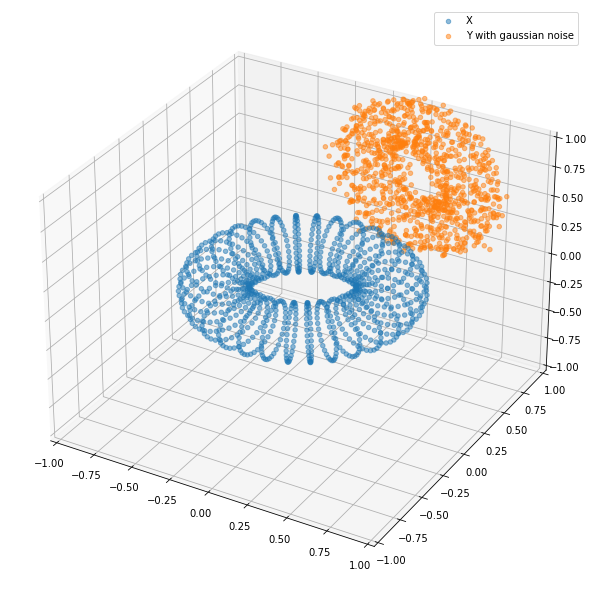

In [7]:
Y = c * R @ (X + np.random.randn(*X.shape) / 30) + t  # computing Y with gaussian noise

scatter(X, Y, labels=['X', 'Y with gaussian noise'])

Now computing Umeyama's solution and comparing it to ground truth.

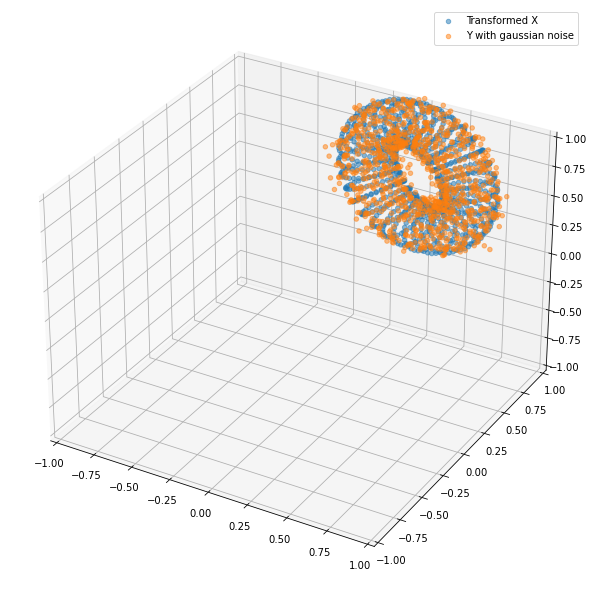

Ground truth c: 0.80
Estimated c: 0.80

Ground truth R:
0.611,	-0.272,	0.743
0.334,	0.940,	0.069
-0.717,	0.206,	0.666
Estimated R:
0.610,	-0.269,	0.746
0.333,	0.940,	0.067
-0.719,	0.208,	0.663

Ground truth t:	0.434	0.547	0.763
Estimated t:	0.434	0.548	0.763


In [8]:
c_estimated, R_estimated, t_estimated = umeyama(X, Y)

scatter(c_estimated * R_estimated @ X + t_estimated, Y, labels=['Transformed X', 'Y with gaussian noise'])

print(f'Ground truth c: {c:.2f}')
print(f'Estimated c: {c_estimated:.2f}\n')
print('Ground truth R:\n' + '\n'.join([',\t'.join(map('{:.3f}'.format, r)) for r in R]))
print('Estimated R:\n' + '\n'.join([',\t'.join(map('{:.3f}'.format, r)) for r in R_estimated]) + '\n')
print('Ground truth t:\t' + '\t'.join(map('{:.3f}'.format, t.flatten())))
print('Estimated t:\t' + '\t'.join(map('{:.3f}'.format, t_estimated.flatten())))